In [42]:
# Import necessary libraries
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# Load the data
db_df = pd.read_csv('DB_Secondary_Defense.csv')
metric = 'Current_PFF'  # Metric to predict

In [44]:
print(db_df.columns)

Index(['Team', 'Year', 'Position', 'Value_cap_space', 'Value_draft_data',
       'Current_AV', 'Current_PFF', 'Total DVOA', 'win-loss-pct', 'Net EPA',
       ...
       'Previous_snap_counts_pass_rush', 'Previous_snap_counts_run_defense',
       'Previous_snap_counts_slot', 'Previous_stops', 'Previous_tackles',
       'Previous_tackles_for_loss', 'Previous_targets',
       'Previous_total_pressures', 'Previous_touchdowns', 'Previous_yards'],
      dtype='object', length=108)


In [45]:
# Sort data by Team and Year
db_df = db_df.sort_values(by=['Team', 'Year'])
print(db_df.head())

      Team  Year Position  Value_cap_space  Value_draft_data  Current_AV  \
17   49ers  2019       DB        15.313496        270.589442        35.0   
50   49ers  2020       DB        13.657921        257.525536        36.0   
70   49ers  2021       DB         7.895890        247.080988        34.0   
123  49ers  2022       DB        11.383285        101.033420        45.0   
12   Bears  2019       DB        19.373007        241.860963        43.0   

     Current_PFF Total DVOA  win-loss-pct  Net EPA  ...  \
17     74.600742     27.90%      0.812500    0.216  ...   
50     66.704119      5.40%      0.375000    0.025  ...   
70     62.219454     19.50%      0.588235    0.081  ...   
123    69.627066     27.60%      0.764706    0.196  ...   
12     66.382439     -2.10%      0.500000   -0.032  ...   

     Previous_snap_counts_pass_rush  Previous_snap_counts_run_defense  \
17                         8.142729                        204.517260   
50                         8.150531       

In [46]:
team_data = db_df.groupby('Team')

In [47]:
import numpy as np

sequences = []
targets = []

# Iterate over each team and its respective data
for team, group in team_data:
    # Ensure the team has at least 4 years of data
    if len(group) >= 4:
        print(f"Processing team: {team}, data length: {len(group)}")  # Debugging: check length of data for each team
        
        # Iterate through the data to create sequences for 3 years
        for i in range(len(group) - 3):
            # Select the relevant columns for the sequence
            sequence = group.iloc[i:i+3][[
                                        'Previous_snap_counts_dl_b_gap',
                                        'Previous_snap_counts_dl_over_t',
                                        'Previous_snap_counts_dl',
                                        'Previous_snap_counts_dl_a_gap',
                                        'Previous_batted_passes',
                                        'Previous_snap_counts_pass_rush',
                                        'Previous_hurries'
                                        ]]
            
            # The target is the next year's Current_PFF
            target = group.iloc[i+3]['Current_PFF']  
            
            sequences.append(sequence.values)  # Add the sequence to the list
            targets.append(target)  # Add the target to the list

# Convert lists to numpy arrays
X = np.array(sequences)
y = np.array(targets)



print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")

Processing team: 49ers, data length: 4
Processing team: Bears, data length: 4
Processing team: Bengals, data length: 4
Processing team: Bills, data length: 4
Processing team: Broncos, data length: 4
Processing team: Browns, data length: 4
Processing team: Buccaneers, data length: 4
Processing team: Cardinals, data length: 4
Processing team: Chargers, data length: 4
Processing team: Chiefs, data length: 4
Processing team: Colts, data length: 4
Processing team: Commanders, data length: 4
Processing team: Cowboys, data length: 4
Processing team: Dolphins, data length: 4
Processing team: Eagles, data length: 4
Processing team: Falcons, data length: 4
Processing team: Giants, data length: 4
Processing team: Jaguars, data length: 4
Processing team: Jets, data length: 4
Processing team: Lions, data length: 4
Processing team: Packers, data length: 4
Processing team: Panthers, data length: 4
Processing team: Patriots, data length: 4
Processing team: Raiders, data length: 4
Processing team: Rams

In [48]:
# Check shape before reshaping
print(X)
print(X.shape)

# Reshape X to (samples, timesteps, features)
X = X.reshape(X.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print(X.shape)  # Should now be (samples, 3, features)
print(X)

scaler = StandardScaler()
X = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)

[[[0.00000000e+00 0.00000000e+00 1.68181936e+01 0.00000000e+00
   0.00000000e+00 8.14272947e+00 1.17599907e+00]
  [0.00000000e+00 0.00000000e+00 1.42916471e+01 0.00000000e+00
   0.00000000e+00 8.15053106e+00 1.25531896e+00]
  [0.00000000e+00 0.00000000e+00 1.37839592e+01 0.00000000e+00
   3.13296402e-01 8.42174188e+00 9.34320301e-01]]

 [[0.00000000e+00 0.00000000e+00 3.84977055e+00 0.00000000e+00
   0.00000000e+00 5.48000179e+00 1.66450527e+00]
  [0.00000000e+00 0.00000000e+00 1.93316736e+01 0.00000000e+00
   0.00000000e+00 1.03930821e+01 1.28494537e+00]
  [0.00000000e+00 0.00000000e+00 1.93459490e+01 8.42802422e-01
   0.00000000e+00 6.72211287e+00 4.59455814e-01]]

 [[0.00000000e+00 0.00000000e+00 7.33198928e+00 0.00000000e+00
   0.00000000e+00 6.15826405e+00 8.04170418e-01]
  [0.00000000e+00 0.00000000e+00 1.55109025e+01 0.00000000e+00
   0.00000000e+00 1.56016899e+01 1.63434894e+00]
  [0.00000000e+00 0.00000000e+00 2.05803869e+01 0.00000000e+00
   4.32579988e-01 1.44088664e+01 9.56

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
# Define the input layer
inputs = Input(shape=(3, 7))  # 3 time steps, 8 features

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.2)(rnn_output)

# Output layer for predicting Current PFF
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)

In [51]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [52]:
# Early stopping callback to monitor validation loss
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

Epoch 1/5


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 47.6962 - val_loss: 22.6014
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38.8259 - val_loss: 14.8013
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.5506 - val_loss: 17.5205
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43.2466 - val_loss: 18.3409
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27.9761 - val_loss: 16.5286


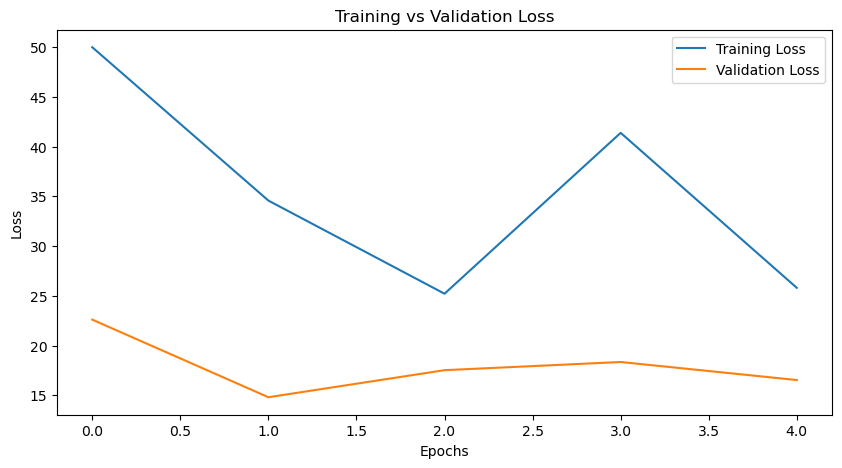

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R² Score: 0.3542


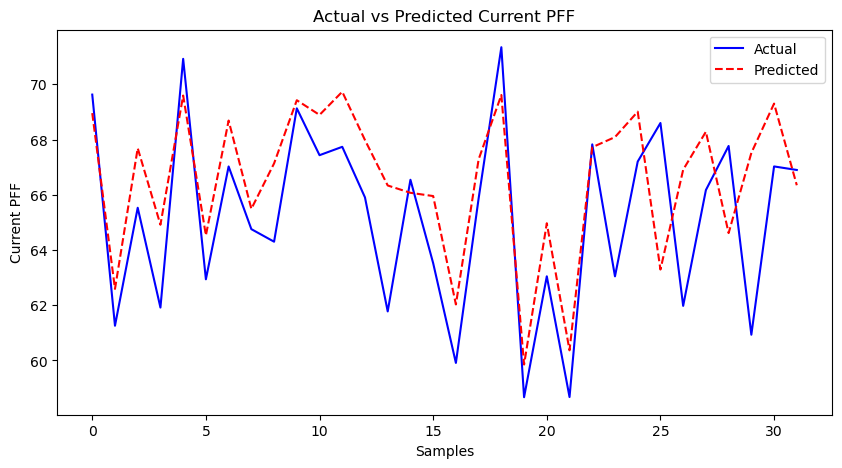

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 44.6209 - val_loss: 20.5025
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.9913 - val_loss: 44.9776
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 58.2254 - val_loss: 43.0169
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 62.1856 - val_loss: 18.6486
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36.2705 - val_loss: 16.8405
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43.6202 - val_loss: 15.6587
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43.1517 - val_loss: 15.6997
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.0739 - val_loss: 23.1046
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43.8029 - val_loss: 31.5070
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 50.1366 - val_loss: 20.4566


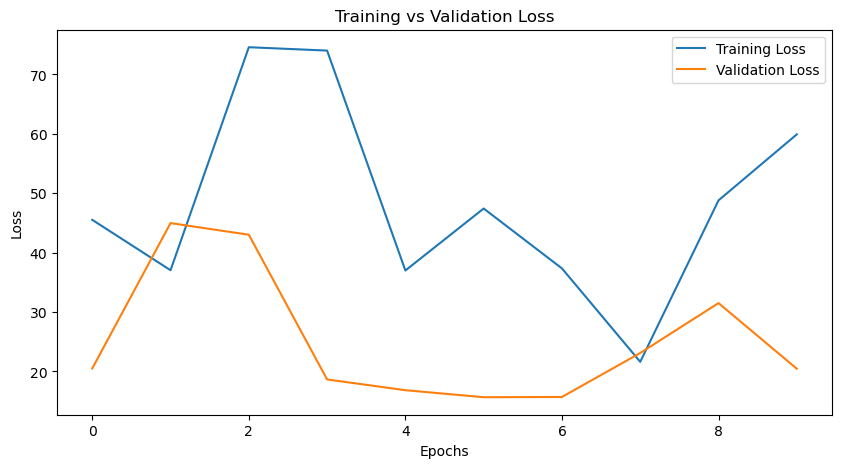

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R² Score: 0.1083


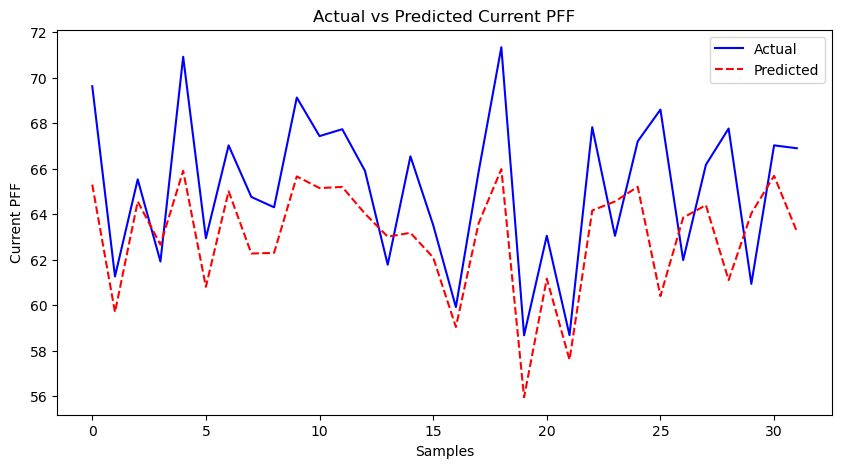

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 31.5325 - val_loss: 16.1150
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52.2501 - val_loss: 16.1636
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43.3760 - val_loss: 15.5414
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 46.8354 - val_loss: 16.1215
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 45.1623 - val_loss: 18.0970
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36.9160 - val_loss: 17.4765
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 49.8944 - val_loss: 19.9439
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 50.2232 - val_loss: 31.0202
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27.4308 - val_loss: 32.9578
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43.2128 - val_loss: 29.7501
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 45.1910 - val_loss: 30.8022
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43.7013 - val_lo

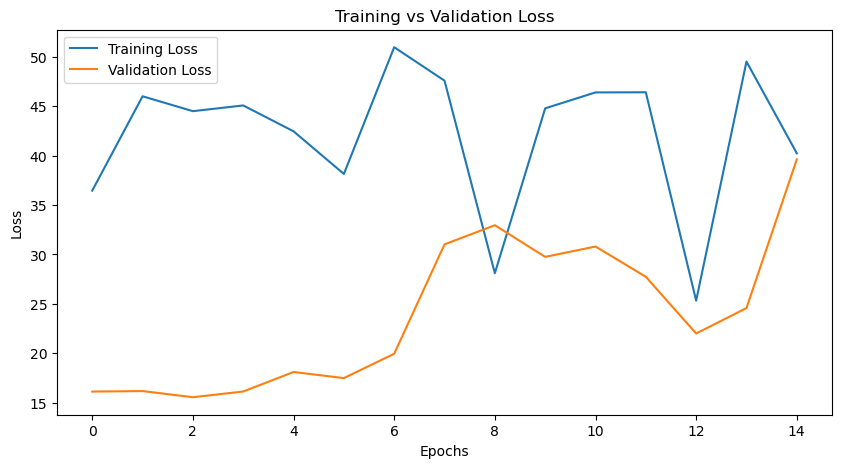

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
R² Score: -1.1272


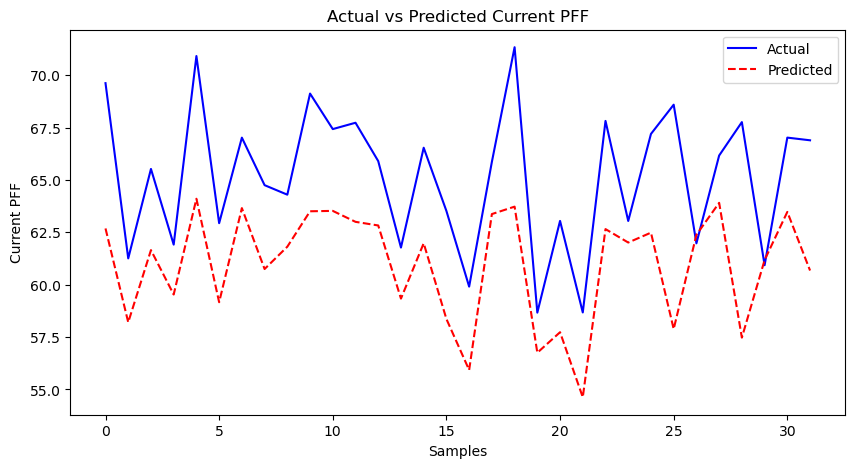

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 49.3965 - val_loss: 36.6476
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 66.5502 - val_loss: 18.8484
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32.6929 - val_loss: 19.4271
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.7415 - val_loss: 24.9775
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.0619 - val_loss: 15.7554
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 46.5249 - val_loss: 17.5969
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 53.6743 - val_loss: 20.0057
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 45.4652 - val_loss: 14.9186
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28.5470 - val_loss: 16.8257
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 48.6373 - val_loss: 15.8719
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.0334 - val_loss: 16.3592
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 61.2823 - val_los

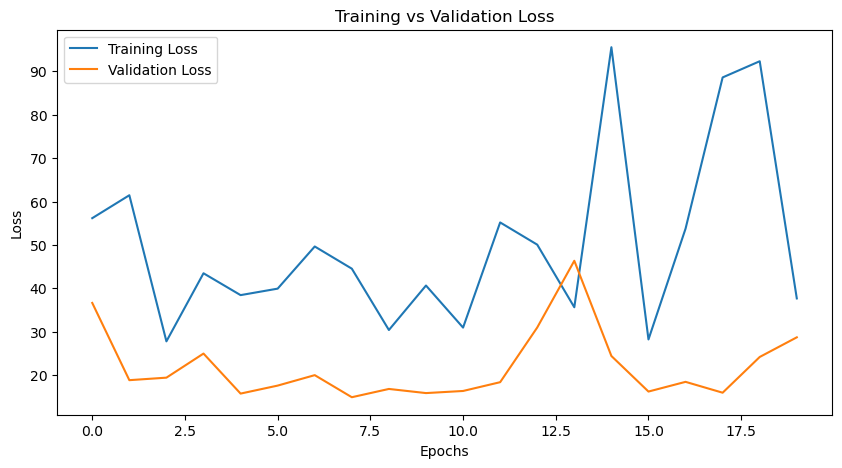

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: -0.4261


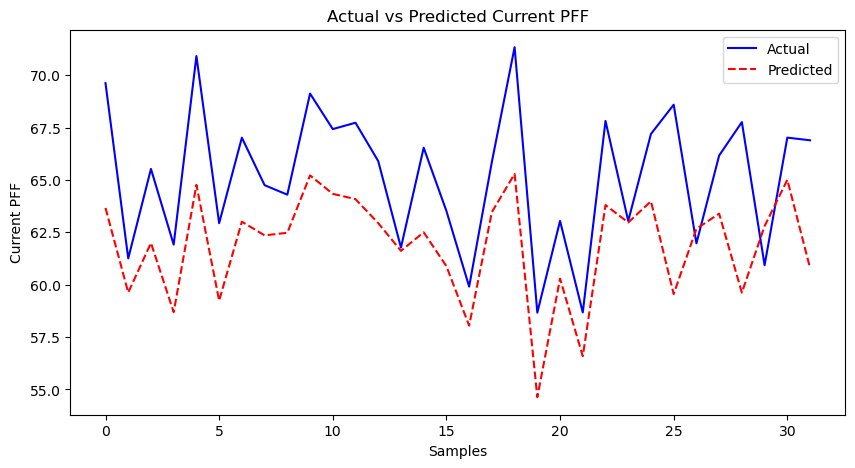

Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 33.2463 - val_loss: 26.0722
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52.2444 - val_loss: 17.0533
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41.2273 - val_loss: 15.7477
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 53.1348 - val_loss: 16.4376
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 21.9033 - val_loss: 23.4786
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42.3842 - val_loss: 28.4698
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 79.2211 - val_loss: 19.3451
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 62.0531 - val_loss: 22.4313
Epoch 9/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 55.4912 - val_loss: 26.2200
Epoch 10/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52.1561 - val_loss: 31.3509
Epoch 11/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 80.4461 - val_loss: 34.8266
Epoch 12/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 55.8723 - val_los

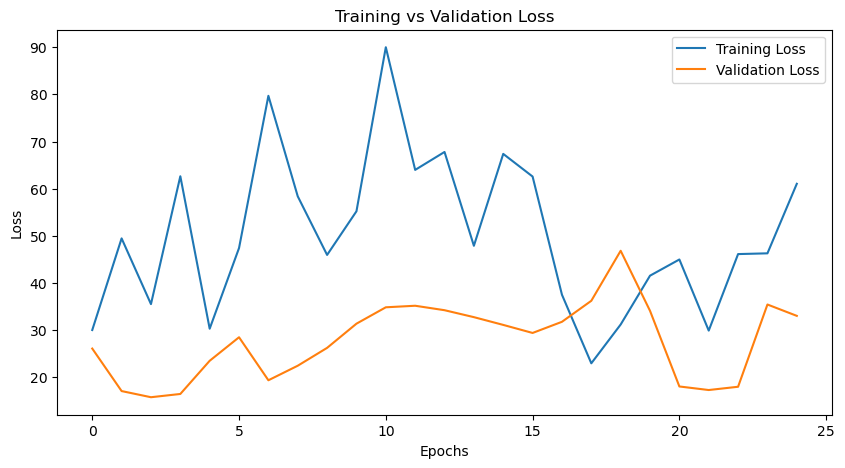

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: -0.6268


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 30.2116 - val_loss: 17.8146
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.3229 - val_loss: 20.1723
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.5288 - val_loss: 20.0606
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 59.3405 - val_loss: 19.4999
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52.3788 - val_loss: 18.1278
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38.8914 - val_loss: 23.4750
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 45.4348 - val_loss: 20.6678
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 33.7166 - val_loss: 20.2477
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 41.6114 - val_loss: 22.4282
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 76.8037 - val_loss: 22.9393
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52.4209 - val_loss: 19.0515
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27.8445 - val_los

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: 0.3352


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 52.4620 - val_loss: 18.8612
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 47.4108 - val_loss: 17.4547
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.7962 - val_loss: 23.3982
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43.5853 - val_loss: 31.5079
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 58.1471 - val_loss: 26.2730
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43.5987 - val_loss: 15.5666
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.7418 - val_loss: 14.8493
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 61.1881 - val_loss: 17.8408
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 40.7779 - val_loss: 15.0586
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.1640 - val_loss: 15.3009
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.0465 - val_loss: 16.1453
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 44.8007 - val_los

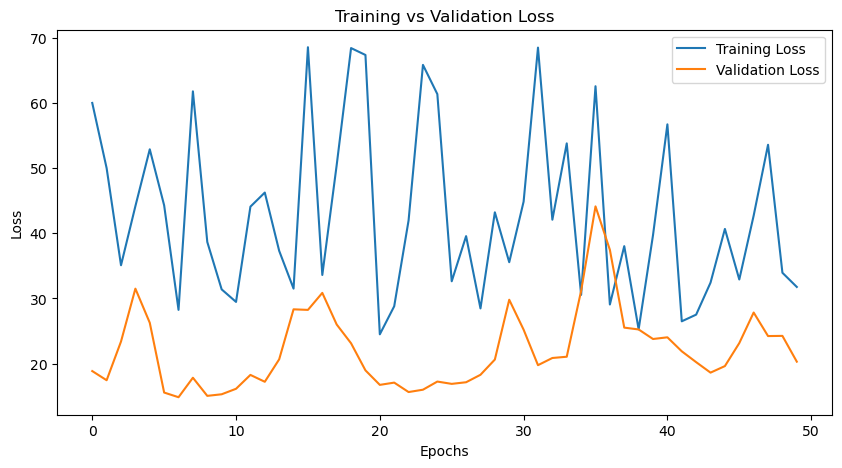

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: 0.4376


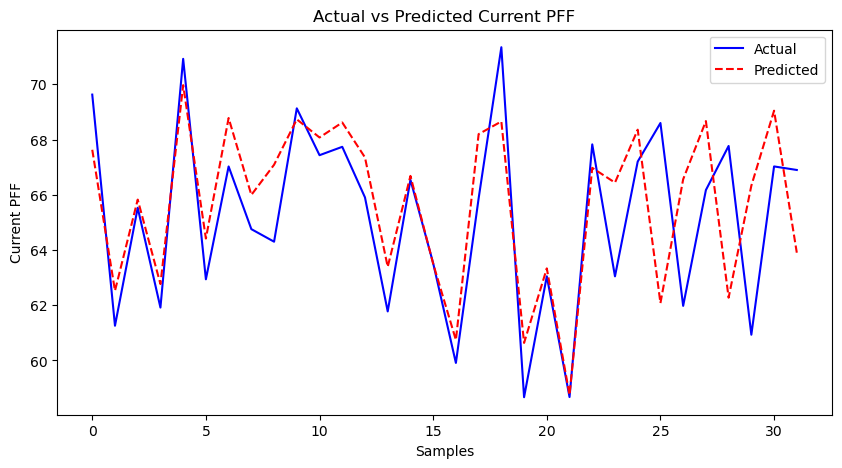

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 55.7086 - val_loss: 21.5073
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41.7822 - val_loss: 19.9554
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38.3888 - val_loss: 29.1932
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 61.0974 - val_loss: 40.7329
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34.4392 - val_loss: 42.9397
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 45.4467 - val_loss: 32.5302
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 64.7893 - val_loss: 25.1911
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.2587 - val_loss: 20.9833
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.1847 - val_loss: 21.3593
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47.8699 - val_loss: 28.6733
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51.5780 - val_loss: 23.1151
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 33.87

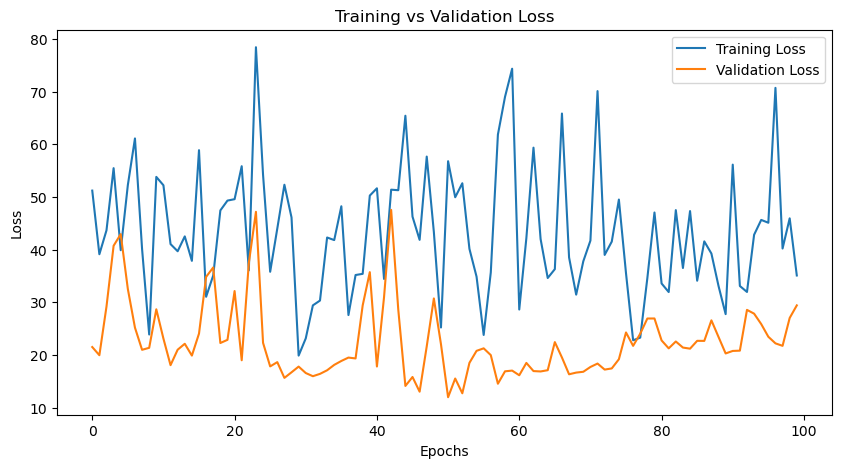

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: -0.0329


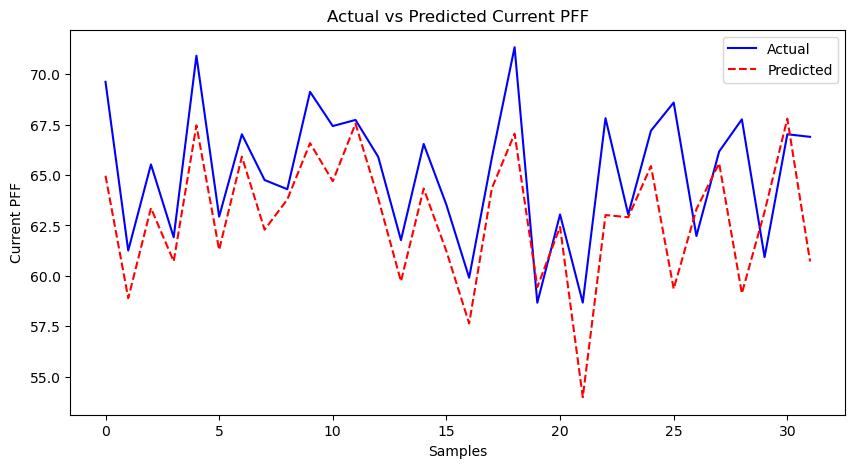

Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 51.9264 - val_loss: 24.2239
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 45.0846 - val_loss: 22.1398
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47.3154 - val_loss: 24.7026
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.6371 - val_loss: 23.9580
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31.9730 - val_loss: 22.8372
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.0572 - val_loss: 23.1047
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.2214 - val_loss: 23.7053
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 64.9486 - val_loss: 27.4918
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41.1114 - val_loss: 34.7588
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 46.9013 - val_loss: 26.4964
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56.7422 - val_loss: 25.2762
Epoch 12/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32.51

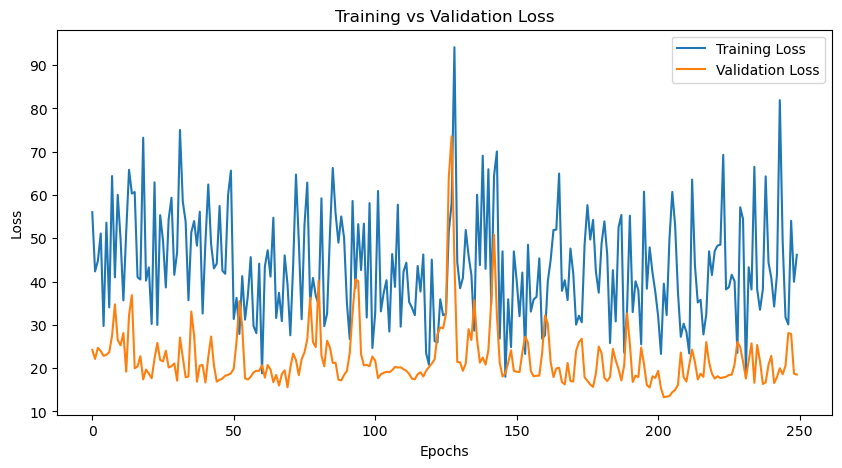

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: 0.4761


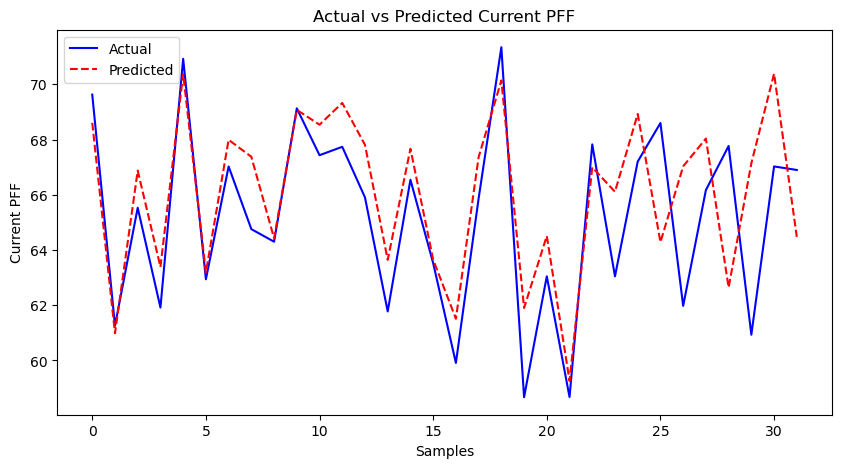

In [59]:
# Train the model
#history = model.fit(X, y, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping])
epoch_list = [5, 10, 15, 20, 25, 30, 50, 100, 250]
for e in epoch_list:
    history = model.fit(X, y, epochs=e, batch_size=8, validation_split=0.2)
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Make predictions on the test set
    y_pred = model.predict(X)
    from sklearn.metrics import r2_score

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Print R² score
    print(f"R² Score: {r2:.4f}")
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(y, label='Actual', color='blue')
    plt.plot(y_pred, label='Predicted', color='red', linestyle='dashed')
    plt.title('Actual vs Predicted Current PFF')
    plt.xlabel('Samples')
    plt.ylabel('Current PFF')
    plt.legend()
    plt.show()

In [ ]:
# Import necessary libraries
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Function to prepare data sequences for a given target metric
def prepare_sequences(db_df, target_metric, sequence_length=3):
    sequences = []
    targets = []
    team_data = db_df.groupby('Team')

    for team, group in team_data:
        # Ensure the team has enough data
        if len(group) >= sequence_length + 1:
            # Iterate through the data to create sequences
            for i in range(len(group) - sequence_length):
                # Select the relevant columns for the sequence
                sequence = group.iloc[i:i+sequence_length][[
                    'Previous_grades_tackle', 
                    'Previous_AV',
                    'Previous_PFF',
                    'Previous_franchise_id',
                    'Previous_grades_run_defense',
                    'Previous_grades_coverage_defense',
                    'Previous_tackles_for_loss'
                ]]
                
                # The target is the next year's target_metric
                target = group.iloc[i+sequence_length][target_metric]
                
                sequences.append(sequence.values)
                targets.append(target)
    
    # Convert lists to numpy arrays
    X = np.array(sequences)
    y = np.array(targets)
    
    print(f"Total sequences generated for {target_metric}: {len(sequences)}")
    print(f"X shape: {X.shape}, y shape: {y.shape}")
    
    # Reshape X to (samples, timesteps, features)
    X = X.reshape(X.shape[0], sequence_length, -1)
    
    # Scale the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)
    
    return X, y, scaler


In [ ]:
# Function to build the model
def build_model(input_shape):
    inputs = Input(shape=input_shape)  # (timesteps, features)
    
    # Add a Dense layer before the attention to create more variability in the input
    dense_input = Dense(16, activation='relu')(inputs)
    
    # Add MultiHeadAttention layer
    attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)
    
    # Add Layer Normalization for stability
    attention_output = LayerNormalization()(attention_output)
    
    # Add RNN layer to capture temporal dependencies
    rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)
    
    # Add Dropout to prevent overfitting
    rnn_output = Dropout(0.2)(rnn_output)
    
    # Output layer for predicting the target metric
    output = Dense(1)(rnn_output)
    
    # Define the model
    model = Model(inputs=inputs, outputs=output)
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model


In [ ]:
# Function to train and evaluate the model
def train_and_evaluate(X, y, target_metric, epochs_list, batch_size=8):
    input_shape = (X.shape[1], X.shape[2])  # (timesteps, features)
    model = build_model(input_shape)
    
    for e in epochs_list:
        print(f"\nTraining {target_metric} with {e} epochs...")
        history = model.fit(
            X, y, 
            epochs=e, 
            batch_size=batch_size, 
            validation_split=0.2, 
            verbose=1
        )
        
        # Plot training & validation loss
        plt.figure(figsize=(10, 5))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Training vs Validation Loss for {target_metric} - {e} Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        
        # Make predictions on the entire dataset (you might want to separate into train/test)
        y_pred = model.predict(X)
        
        # Calculate R² score
        r2 = r2_score(y, y_pred)
        print(f"R² Score for {target_metric} after {e} epochs: {r2:.4f}")
        
        # Plot actual vs predicted values
        plt.figure(figsize=(10, 5))
        plt.scatter(range(len(y)), y, label='Actual', color='blue', alpha=0.5)
        plt.scatter(range(len(y_pred)), y_pred, label='Predicted', color='red', alpha=0.5)
        plt.title(f'Actual vs Predicted {target_metric} after {e} Epochs')
        plt.xlabel('Samples')
        plt.ylabel(target_metric)
        plt.legend()
        plt.show()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


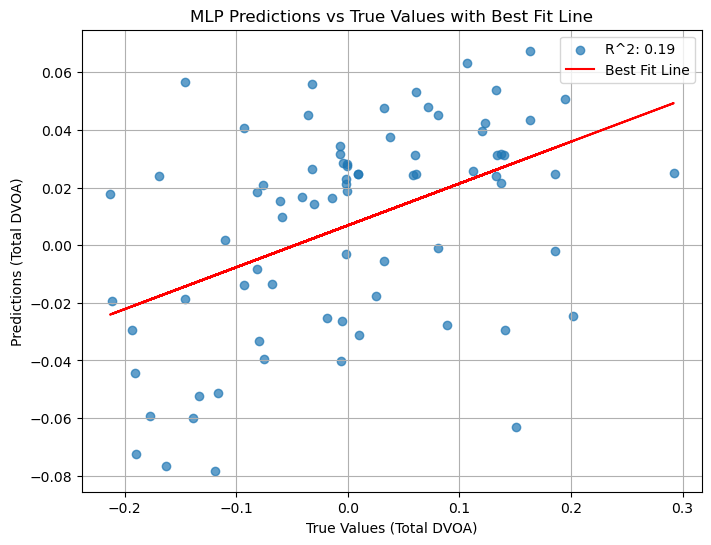

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Combined_Secondary_Defense.csv'  # Replace with the correct path to your file
data = pd.read_csv(file_path)

# Preprocessing
data['Total DVOA'] = data['Total DVOA'].str.rstrip('%').astype(float) / 100  # Convert percentages to decimals
data = data.dropna(subset=['Current_PFF', 'Net EPA'])  # Drop rows with missing values

# Add more features
X = data[['Current_PFF']].values  # Example features
y = data[['Net EPA']].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build an enhanced MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.3),  # Add dropout for regularization
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Single output for regression
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Lower learning rate
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, 
                    validation_split=0.2, callbacks=[early_stopping], verbose=0)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Compute R^2 score
r2 = r2_score(y_test, y_pred)

# Scatter plot with predictions vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, label=f'R^2: {r2:.2f}')

# Line of best fit
m, b = np.polyfit(y_test.flatten(), y_pred.flatten(), 1)  # Linear fit
plt.plot(y_test, m * y_test + b, color='red', label='Best Fit Line')

# Plot formatting
plt.xlabel('True Values (Total DVOA)')
plt.ylabel('Predictions (Total DVOA)')
plt.title('MLP Predictions vs True Values with Best Fit Line')
plt.legend()
plt.grid(True)
plt.show()



First few rows of the DataFrame:
      Team  Year Position  Value_cap_space  Value_draft_data  Current_AV  \
17   49ers  2019       DL        15.903294       1400.696696        53.0   
49   49ers  2019       LB        15.993624        146.484990        28.0   
81   49ers  2019       DB        15.313496        270.589442        35.0   
114  49ers  2020       DL         6.755802       1402.398565        39.0   
146  49ers  2020       LB         2.991927        144.514132        34.0   

     Current_PFF Total DVOA  win-loss-pct  Net EPA  ...  \
17     76.896506     27.90%        0.8125    0.216  ...   
49     63.131934     27.90%        0.8125    0.216  ...   
81     74.600742     27.90%        0.8125    0.216  ...   
114    60.632050      5.40%        0.3750    0.025  ...   
146    73.581955      5.40%        0.3750    0.025  ...   

     Previous_snap_counts_pass_rush  Previous_snap_counts_run_defense  \
17                       327.077444                        217.831236   
49       

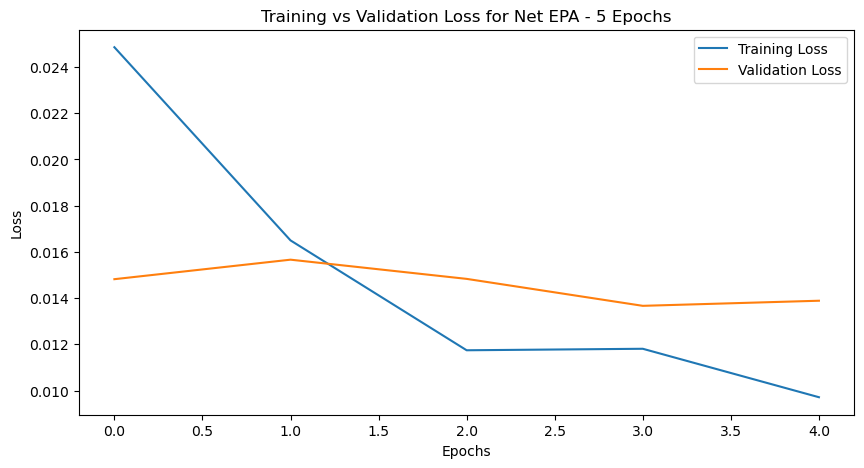

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/stepWARNING:tensorflow:5 out of the last 14 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x2fc7b34c0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
R² Score for Net EPA after 5 epochs: 0.1533
MAE for Net EPA after 5 epochs: 0.0967
RMSE for Net EPA after 5 epochs: 0.1169


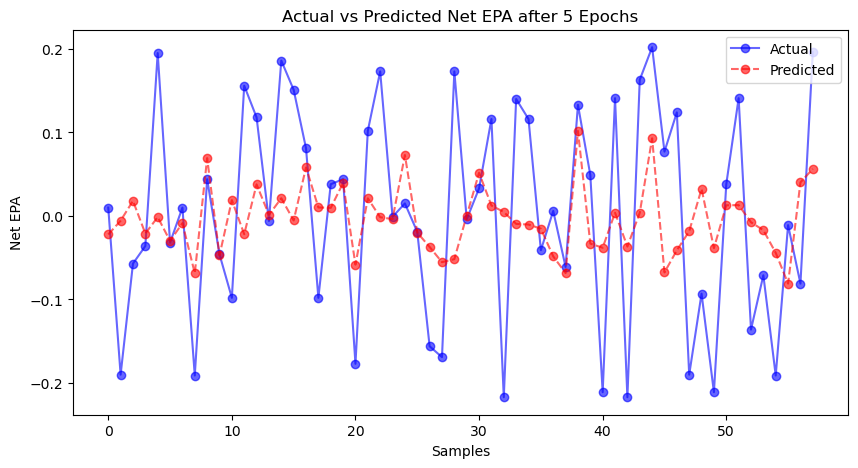


Training Net EPA with 10 epochs...
Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0099 - val_loss: 0.0135
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0089 - val_loss: 0.0125
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0082 - val_loss: 0.0119
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0076 - val_loss: 0.0112
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0078 - val_loss: 0.0110
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0098 - val_loss: 0.0113
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0083 - val_loss: 0.0112
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0079 - val_loss: 0.0106
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0072 - val_loss: 0.0101
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 - val_loss: 0.0105


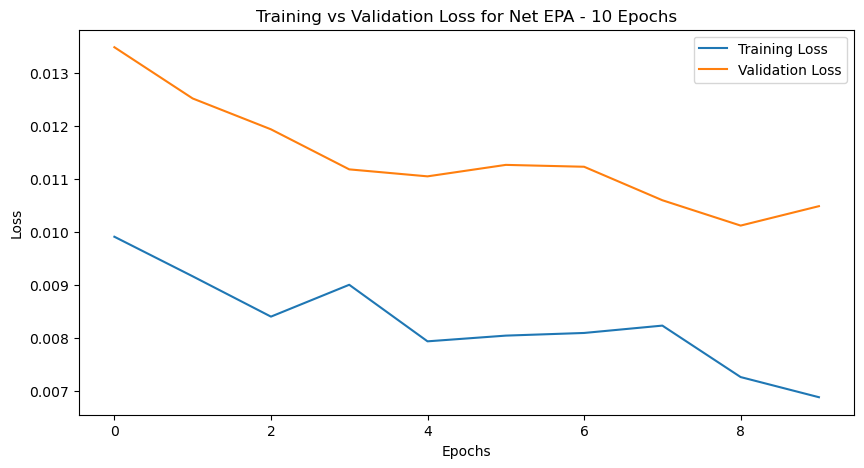

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Net EPA after 10 epochs: 0.3729
MAE for Net EPA after 10 epochs: 0.0820
RMSE for Net EPA after 10 epochs: 0.1006


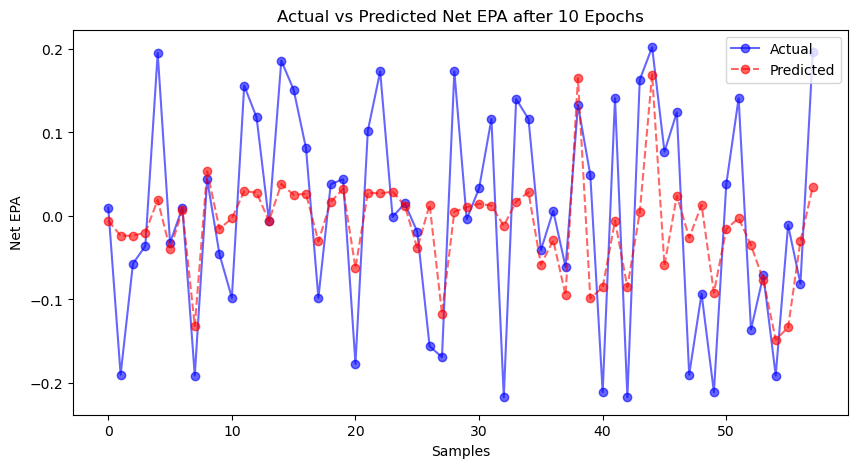


Training Net EPA with 15 epochs...
Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0073 - val_loss: 0.0103
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0057 - val_loss: 0.0097
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0059 - val_loss: 0.0105
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055 - val_loss: 0.0097
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0063 - val_loss: 0.0104
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055 - val_loss: 0.0097
Epoch 7/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0061 - val_loss: 0.0099
Epoch 8/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0054 - val_loss: 0.0104
Epoch 9/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0071 - val_loss: 0.0099
Epoch 10/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0049 - val_loss: 0.0109
Epoch 11/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0048 - val_loss: 0.0103
Epoch 12/15
29/29 ━━━━━━━━━━━━━━━━━━━━

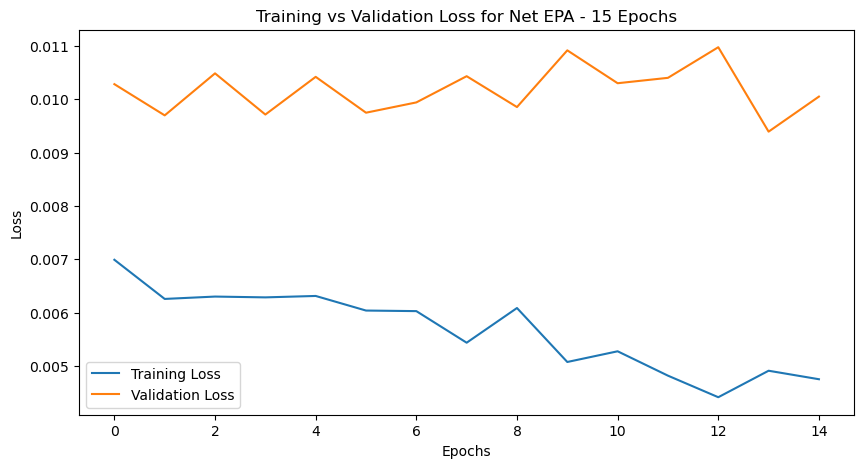

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Net EPA after 15 epochs: 0.4179
MAE for Net EPA after 15 epochs: 0.0797
RMSE for Net EPA after 15 epochs: 0.0969


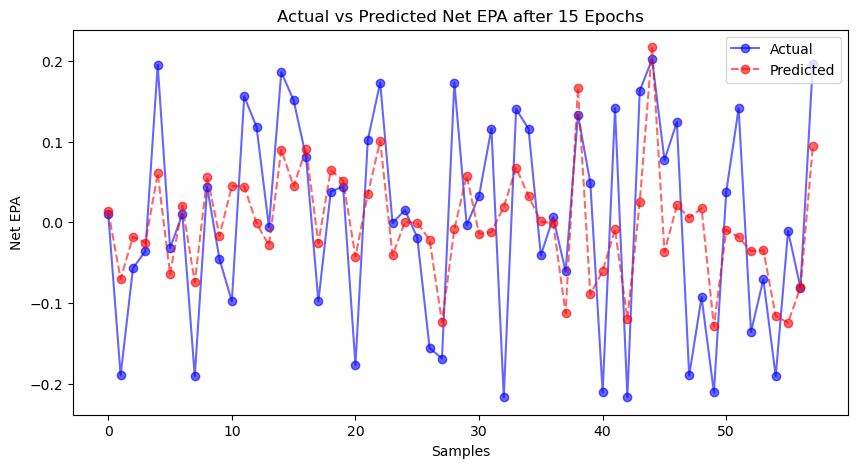


Training Net EPA with 20 epochs...
Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044 - val_loss: 0.0092
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038 - val_loss: 0.0095
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0044 - val_loss: 0.0104
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0043 - val_loss: 0.0090
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0043 - val_loss: 0.0110
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0041 - val_loss: 0.0088
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030 - val_loss: 0.0109
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0035 - val_loss: 0.0086
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037 - val_loss: 0.0085
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025 - val_loss: 0.0093
Epoch 11/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0028 - val_loss: 0.0087
Epoch 12/20
29/29 ━━━━━━━━━━━━━━━━━━━━

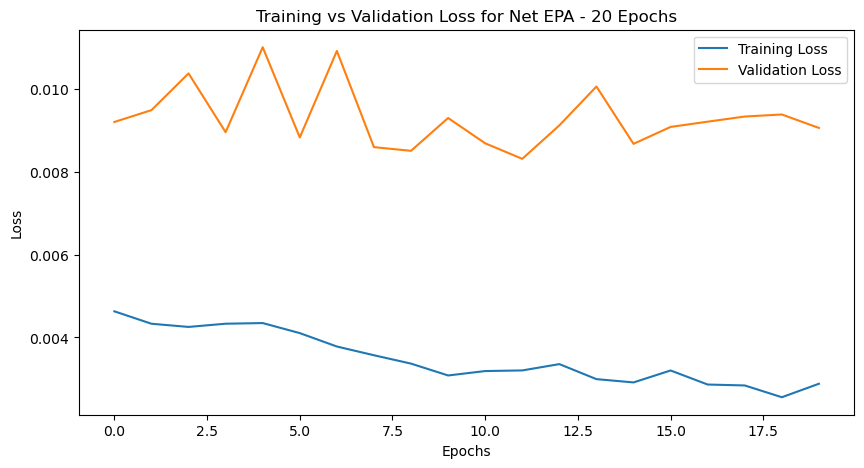

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Net EPA after 20 epochs: 0.4847
MAE for Net EPA after 20 epochs: 0.0740
RMSE for Net EPA after 20 epochs: 0.0912


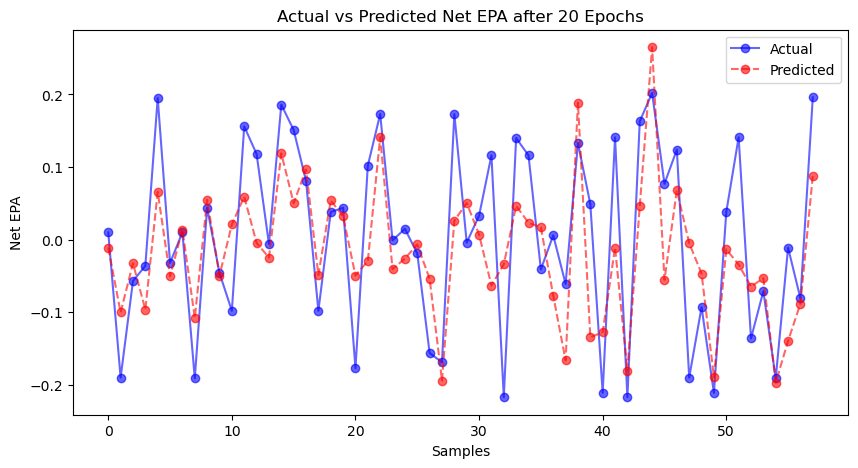


Training Net EPA with 25 epochs...
Epoch 1/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028 - val_loss: 0.0089
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027 - val_loss: 0.0093
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0038 - val_loss: 0.0103
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0029 - val_loss: 0.0087
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0023 - val_loss: 0.0100
Epoch 6/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025 - val_loss: 0.0101
Epoch 7/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0029 - val_loss: 0.0084
Epoch 8/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025 - val_loss: 0.0090
Epoch 9/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031 - val_loss: 0.0082
Epoch 10/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027 - val_loss: 0.0096
Epoch 11/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0021 - val_loss: 0.0097
Epoch 12/25
29/29 ━━━━━━━━━━━━━━━━━━━━

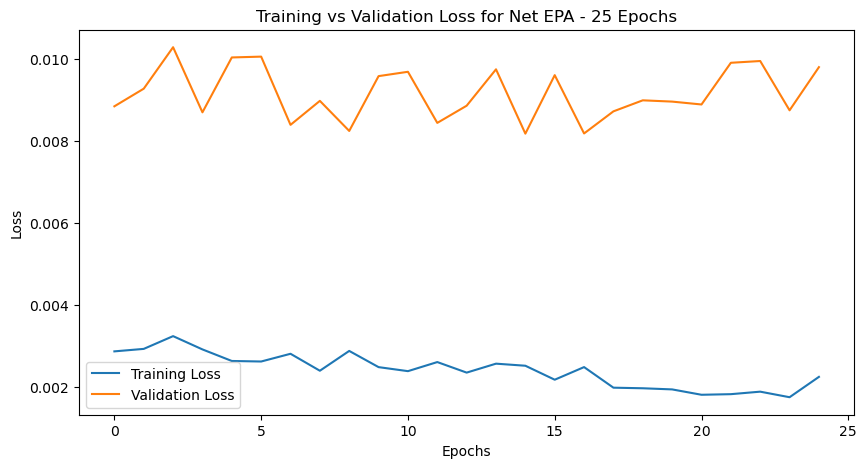

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step
R² Score for Net EPA after 25 epochs: 0.4929
MAE for Net EPA after 25 epochs: 0.0735
RMSE for Net EPA after 25 epochs: 0.0905



Training Net EPA with 30 epochs...
Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026 - val_loss: 0.0088
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026 - val_loss: 0.0099
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020 - val_loss: 0.0086
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - val_loss: 0.0086
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0017 - val_loss: 0.0105
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0023 - val_loss: 0.0100
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024 - val_loss: 0.0093
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020 - val_loss: 0.0078
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - val_loss: 0.0090
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019 - val_loss: 0.0101
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0018 - val_loss: 0.0103
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Net EPA after 30 epochs: 0.5149
MAE for Net EPA after 30 epochs: 0.0683
RMSE for Net EPA after 30 epochs: 0.0885


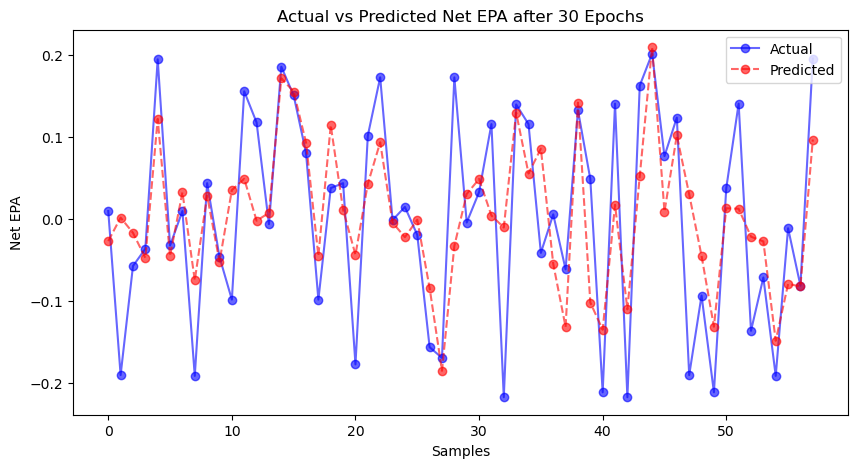


Training Net EPA with 50 epochs...
Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017 - val_loss: 0.0086
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - val_loss: 0.0089
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020 - val_loss: 0.0094
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0021 - val_loss: 0.0085
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 - val_loss: 0.0097
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0021 - val_loss: 0.0104
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019 - val_loss: 0.0094
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0018 - val_loss: 0.0088
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 - val_loss: 0.0091
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 - val_loss: 0.0088
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0015 - val_loss: 0.0081
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━

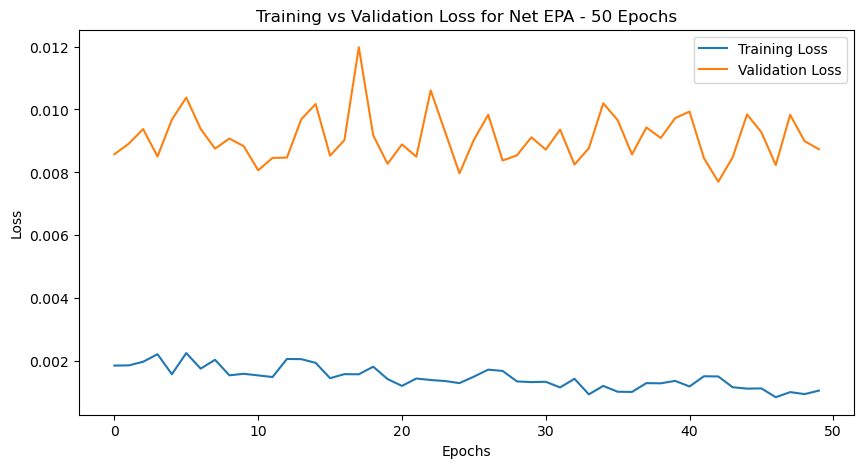

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Net EPA after 50 epochs: 0.5226
MAE for Net EPA after 50 epochs: 0.0649
RMSE for Net EPA after 50 epochs: 0.0878


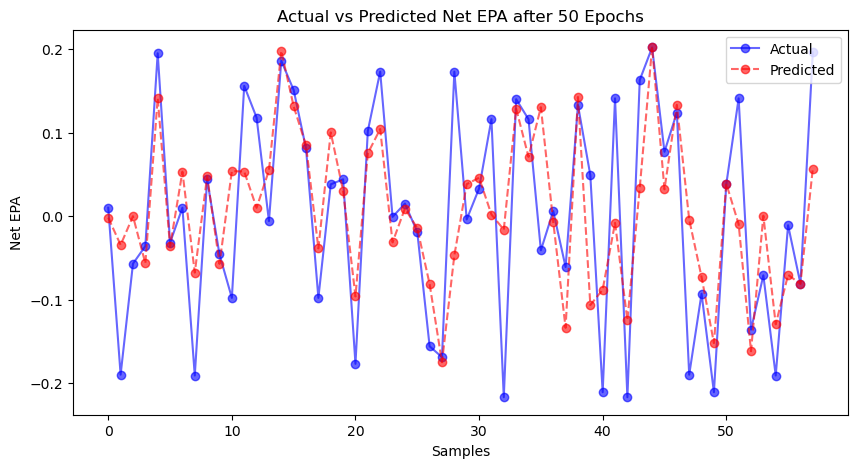


Training Net EPA with 100 epochs...
Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0012 - val_loss: 0.0104
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011 - val_loss: 0.0087
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.1872e-04 - val_loss: 0.0085
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0013 - val_loss: 0.0087
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.7369e-04 - val_loss: 0.0092
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.4133e-04 - val_loss: 0.0093
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.0107e-04 - val_loss: 0.0088
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012 - val_loss: 0.0092
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.4377e-04 - val_loss: 0.0085
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010 - val_loss: 0.0096
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.6736e-04 - val_loss: 0.0083
Ep

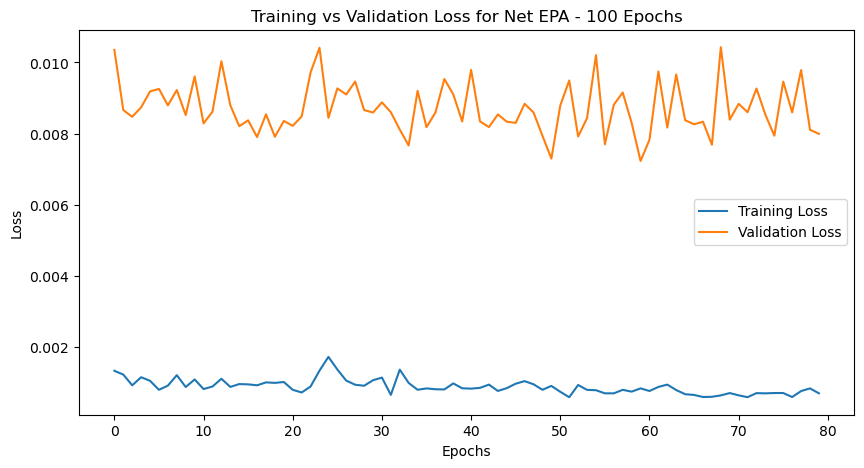

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Net EPA after 100 epochs: 0.5518
MAE for Net EPA after 100 epochs: 0.0627
RMSE for Net EPA after 100 epochs: 0.0850


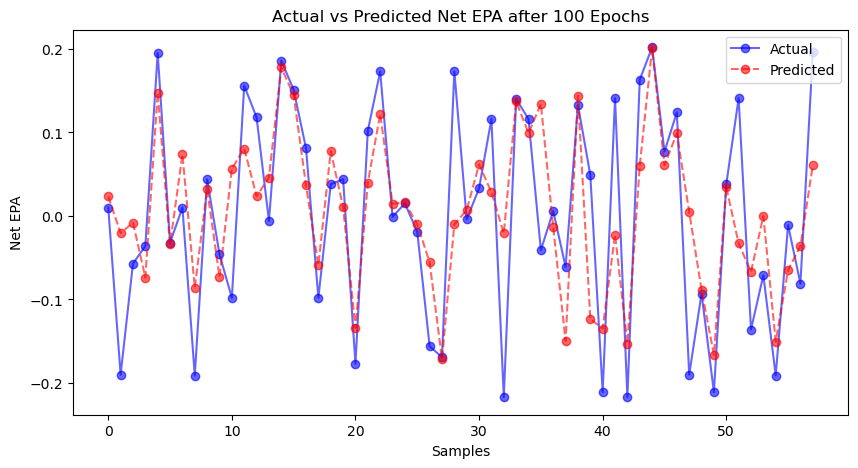


Training Net EPA with 250 epochs...
Epoch 1/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.4819e-04 - val_loss: 0.0085
Epoch 2/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010 - val_loss: 0.0080
Epoch 3/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.9527e-04 - val_loss: 0.0087
Epoch 4/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.9322e-04 - val_loss: 0.0087
Epoch 5/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011 - val_loss: 0.0093
Epoch 6/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.1986e-04 - val_loss: 0.0080
Epoch 7/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.3542e-04 - val_loss: 0.0078
Epoch 8/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.8062e-04 - val_loss: 0.0089
Epoch 9/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011 - val_loss: 0.0085
Epoch 10/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.0143e-04 - val_loss: 0.0078
Epoch 11/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.6232e-04 - val_loss: 0

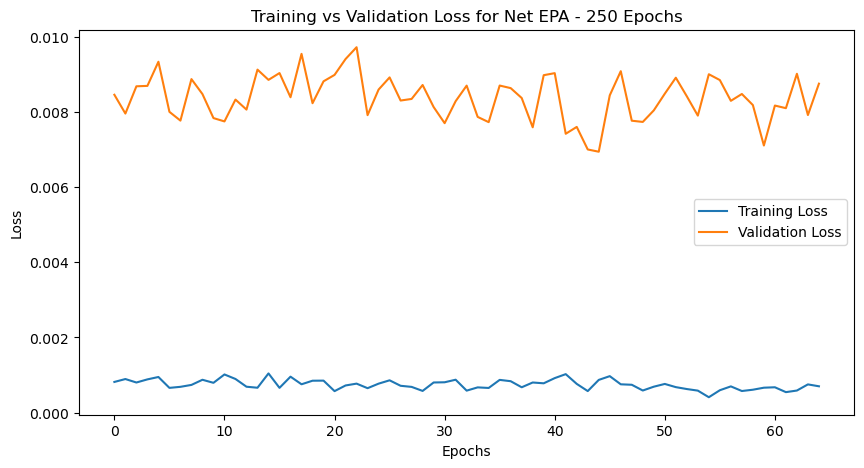

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step
R² Score for Net EPA after 250 epochs: 0.5697
MAE for Net EPA after 250 epochs: 0.0631
RMSE for Net EPA after 250 epochs: 0.0833


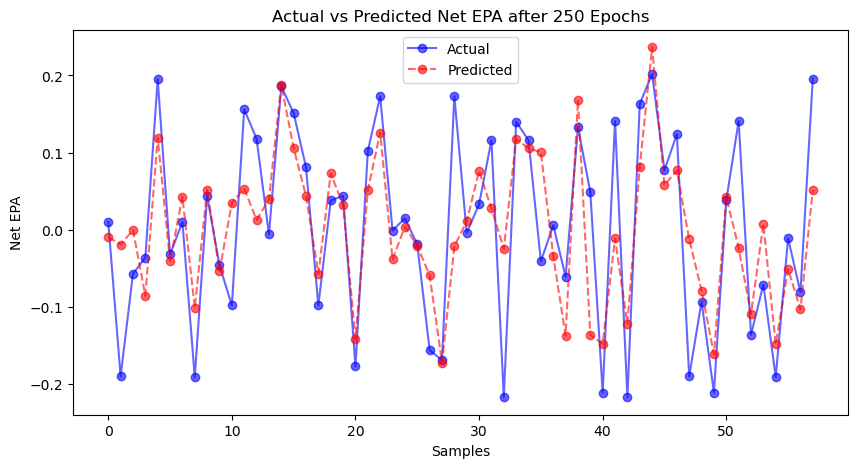


Preparing data for target metric: Total DVOA
Total sequences generated for Total DVOA: 288
X shape: (288, 3, 7), y shape: (288,)

Data Types in X_train: float64
Data Types in X_test: float64
Data Types in y_train: float64
Data Types in y_test: float64

Training Total DVOA with 5 epochs...
Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0540 - val_loss: 0.0368
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0294 - val_loss: 0.0373
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0277 - val_loss: 0.0353
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0285 - val_loss: 0.0349
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0266 - val_loss: 0.0368


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
R² Score for Total DVOA after 5 epochs: 0.0506
MAE for Total DVOA after 5 epochs: 0.1571
RMSE for Total DVOA after 5 epochs: 0.1868


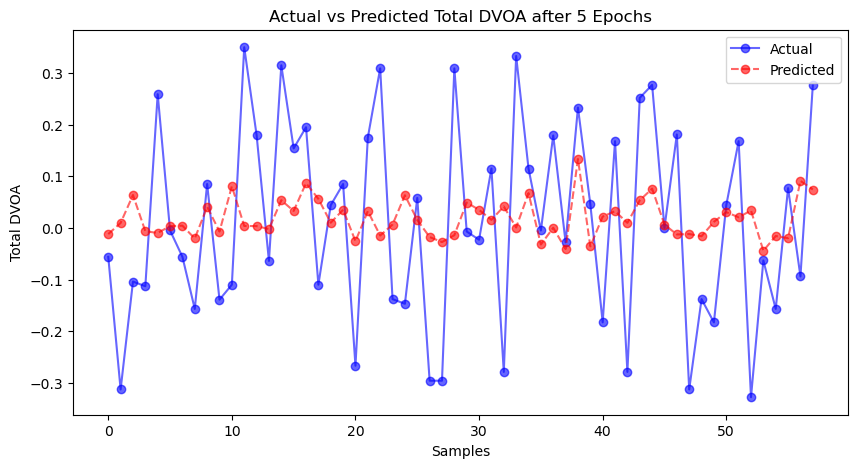


Training Total DVOA with 10 epochs...
Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0247 - val_loss: 0.0345
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0245 - val_loss: 0.0338
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0221 - val_loss: 0.0329
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0246 - val_loss: 0.0335
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0218 - val_loss: 0.0323
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0213 - val_loss: 0.0322
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0198 - val_loss: 0.0308
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0193 - val_loss: 0.0310
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0216 - val_loss: 0.0296
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0210 - val_loss: 0.0294


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step
R² Score for Total DVOA after 10 epochs: 0.2008
MAE for Total DVOA after 10 epochs: 0.1429
RMSE for Total DVOA after 10 epochs: 0.1714



Training Total DVOA with 15 epochs...
Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0197 - val_loss: 0.0294
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0215 - val_loss: 0.0285
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0206 - val_loss: 0.0278
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0166 - val_loss: 0.0277
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0146 - val_loss: 0.0284
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0143 - val_loss: 0.0269
Epoch 7/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0144 - val_loss: 0.0295
Epoch 8/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0141 - val_loss: 0.0281
Epoch 9/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0150 - val_loss: 0.0269
Epoch 10/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0135 - val_loss: 0.0281
Epoch 11/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0134 - val_loss: 0.0274
Epoch 12/15
29/29 ━━━━━━━━━━━━━━━━━

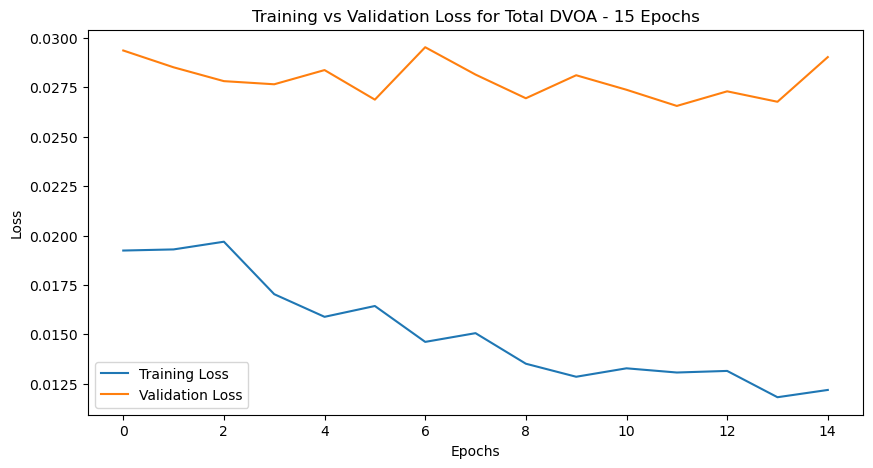

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step
R² Score for Total DVOA after 15 epochs: 0.2774
MAE for Total DVOA after 15 epochs: 0.1309
RMSE for Total DVOA after 15 epochs: 0.1630


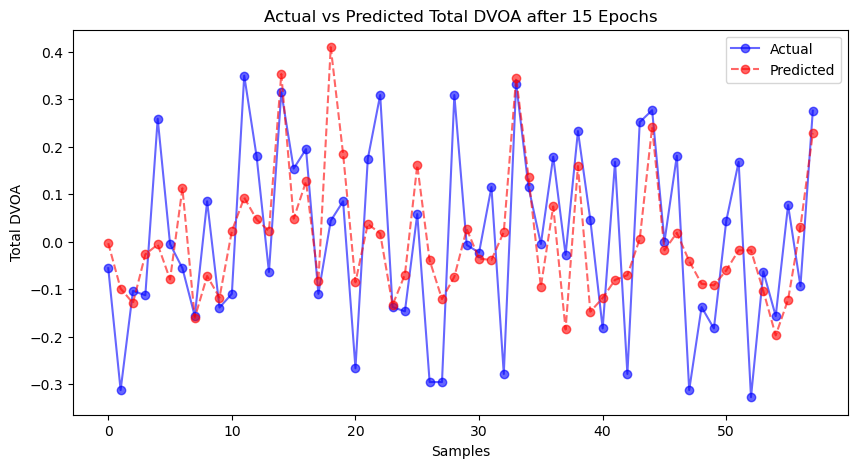


Training Total DVOA with 20 epochs...
Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0112 - val_loss: 0.0274
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0121 - val_loss: 0.0270
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0099 - val_loss: 0.0258
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0115 - val_loss: 0.0250
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0110 - val_loss: 0.0260
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0130 - val_loss: 0.0242
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0108 - val_loss: 0.0255
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0081 - val_loss: 0.0255
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0089 - val_loss: 0.0241
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0093 - val_loss: 0.0256
Epoch 11/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0089 - val_loss: 0.0262
Epoch 12/20
29/29 ━━━━━━━━━━━━━━━━━

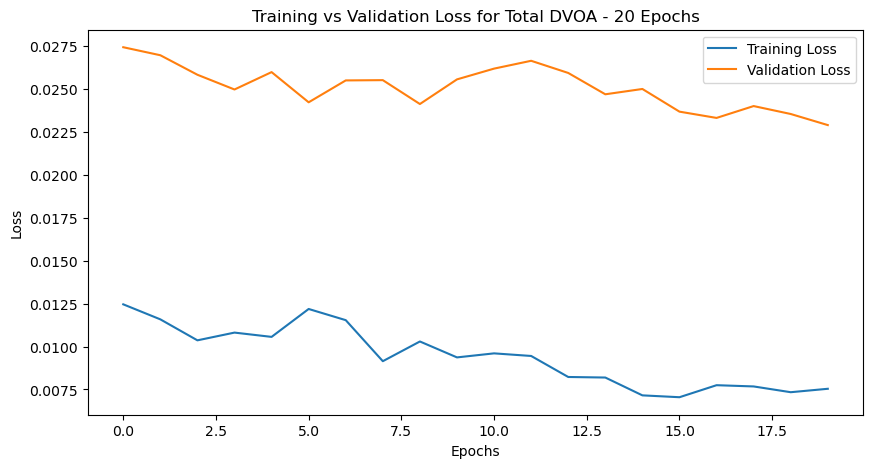

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step
R² Score for Total DVOA after 20 epochs: 0.3770
MAE for Total DVOA after 20 epochs: 0.1206
RMSE for Total DVOA after 20 epochs: 0.1513


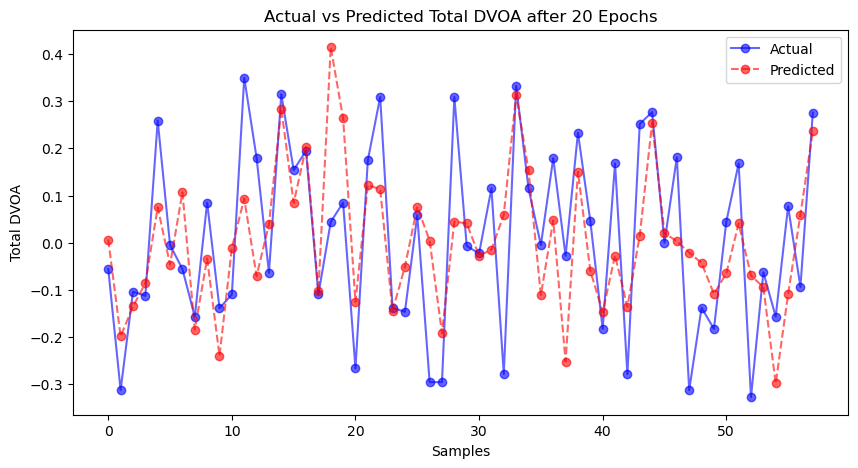


Training Total DVOA with 25 epochs...
Epoch 1/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0065 - val_loss: 0.0227
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0061 - val_loss: 0.0219
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0060 - val_loss: 0.0224
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0058 - val_loss: 0.0226
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0061 - val_loss: 0.0225
Epoch 6/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0054 - val_loss: 0.0219
Epoch 7/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0053 - val_loss: 0.0227
Epoch 8/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0052 - val_loss: 0.0220
Epoch 9/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0061 - val_loss: 0.0210
Epoch 10/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0049 - val_loss: 0.0224
Epoch 11/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055 - val_loss: 0.0217
Epoch 12/25
29/29 ━━━━━━━━━━━━━━━━━

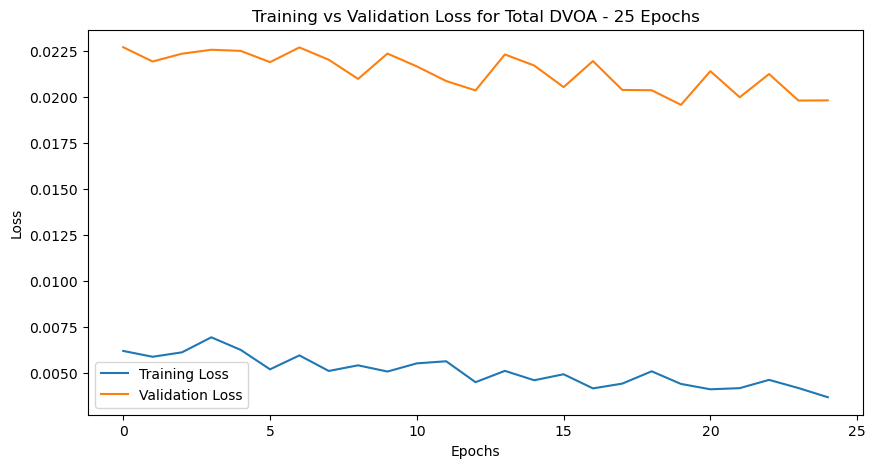

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Total DVOA after 25 epochs: 0.4671
MAE for Total DVOA after 25 epochs: 0.1112
RMSE for Total DVOA after 25 epochs: 0.1400


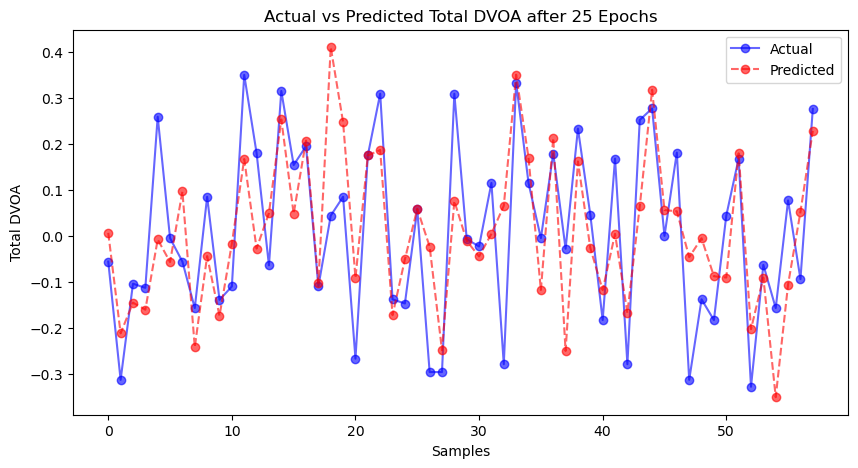


Training Total DVOA with 30 epochs...
Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040 - val_loss: 0.0200
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0052 - val_loss: 0.0205
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038 - val_loss: 0.0201
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0041 - val_loss: 0.0199
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0046 - val_loss: 0.0184
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0035 - val_loss: 0.0190
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0039 - val_loss: 0.0192
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0046 - val_loss: 0.0192
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0043 - val_loss: 0.0186
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0032 - val_loss: 0.0232
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0045 - val_loss: 0.0186
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step
R² Score for Total DVOA after 30 epochs: 0.5543
MAE for Total DVOA after 30 epochs: 0.1036
RMSE for Total DVOA after 30 epochs: 0.1280


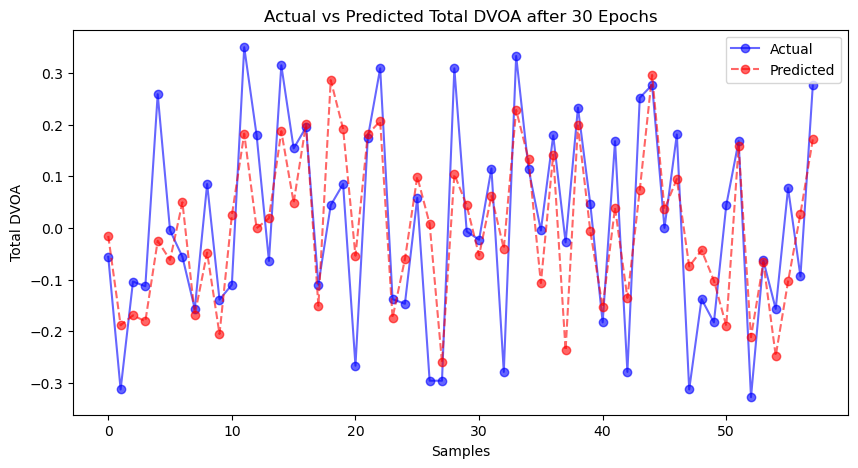


Training Total DVOA with 50 epochs...
Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027 - val_loss: 0.0179
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0023 - val_loss: 0.0177
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0029 - val_loss: 0.0177
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0033 - val_loss: 0.0186
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025 - val_loss: 0.0182
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031 - val_loss: 0.0186
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0023 - val_loss: 0.0175
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - val_loss: 0.0171
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0033 - val_loss: 0.0172
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0030 - val_loss: 0.0171
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0028 - val_loss: 0.0174
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step
R² Score for Total DVOA after 50 epochs: 0.5775
MAE for Total DVOA after 50 epochs: 0.0965
RMSE for Total DVOA after 50 epochs: 0.1246


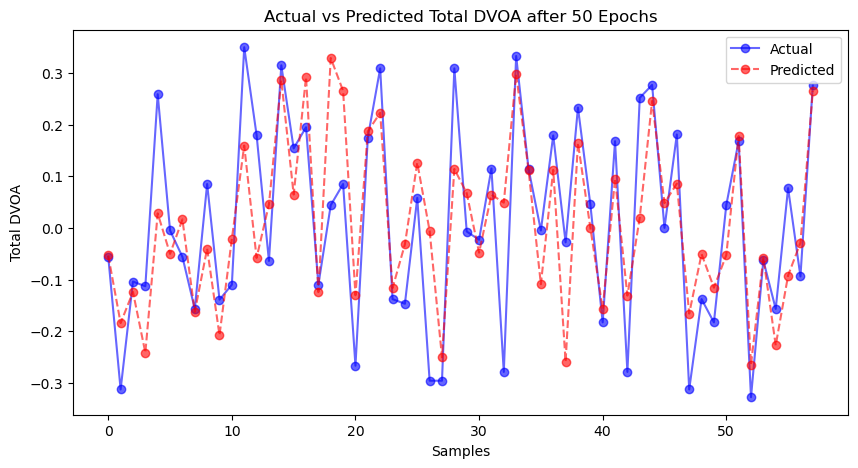


Training Total DVOA with 100 epochs...
Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024 - val_loss: 0.0167
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025 - val_loss: 0.0193
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0044 - val_loss: 0.0170
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0031 - val_loss: 0.0177
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0021 - val_loss: 0.0178
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0028 - val_loss: 0.0168
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027 - val_loss: 0.0161
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0023 - val_loss: 0.0177
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024 - val_loss: 0.0172
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027 - val_loss: 0.0173
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026 - val_loss: 0.0155
Epoch 12/100
29/29 ━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step
R² Score for Total DVOA after 100 epochs: 0.5881
MAE for Total DVOA after 100 epochs: 0.0967
RMSE for Total DVOA after 100 epochs: 0.1230



Training Total DVOA with 250 epochs...
Epoch 1/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 - val_loss: 0.0158
Epoch 2/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - val_loss: 0.0182
Epoch 3/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025 - val_loss: 0.0153
Epoch 4/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0024 - val_loss: 0.0161
Epoch 5/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0020 - val_loss: 0.0171
Epoch 6/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025 - val_loss: 0.0165
Epoch 7/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019 - val_loss: 0.0169
Epoch 8/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0022 - val_loss: 0.0167
Epoch 9/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027 - val_loss: 0.0176
Epoch 10/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0029 - val_loss: 0.0164
Epoch 11/250
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027 - val_loss: 0.0169
Epoch 12/250
29/29 ━━━━

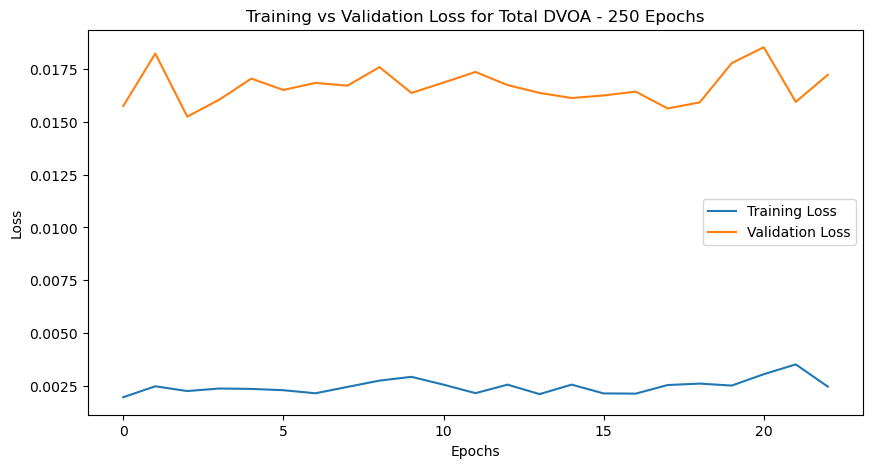

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step
R² Score for Total DVOA after 250 epochs: 0.5850
MAE for Total DVOA after 250 epochs: 0.0997
RMSE for Total DVOA after 250 epochs: 0.1235


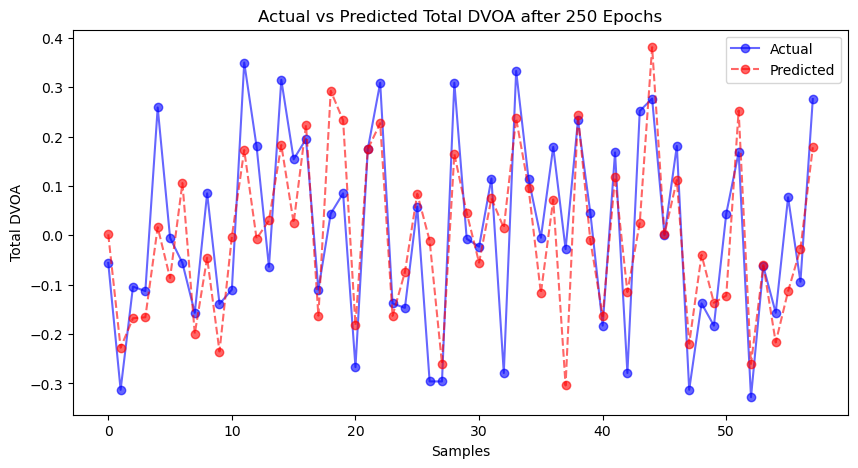

In [ ]:
# Import necessary libraries
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.impute import SimpleImputer

# Function to clean percentage columns
def clean_percentage_column(db_df, column):
    # Remove '%' and convert to float, then divide by 100 if it's a percentage
    db_df[column] = db_df[column].str.replace('%', '').astype(float) / 100.0
    return db_df

# Function to prepare data sequences for a given target metric
def prepare_sequences(db_df, target_metric, feature_cols, sequence_length=3, test_size=0.2):
    sequences = []
    targets = []
    team_data = db_df.groupby('Team')

    for team, group in team_data:
        # Ensure the team has enough data
        if len(group) >= sequence_length + 1:
            # Iterate through the data to create sequences
            for i in range(len(group) - sequence_length):
                # Select the relevant columns for the sequence
                sequence = group.iloc[i:i+sequence_length][feature_cols]
                
                # The target is the next year's target_metric
                target = group.iloc[i+sequence_length][target_metric]
                
                sequences.append(sequence.values)
                targets.append(target)

    # Convert lists to numpy arrays
    X = np.array(sequences)
    y = np.array(targets)

    print(f"Total sequences generated for {target_metric}: {len(sequences)}")
    print(f"X shape: {X.shape}, y shape: {y.shape}")

    # Reshape X to (samples, timesteps, features)
    X = X.reshape(X.shape[0], sequence_length, -1)

    # Scale the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    return X_train, X_test, y_train, y_test, scaler

# Function to build the model
def build_model(input_shape):
    inputs = Input(shape=input_shape)  # (timesteps, features)
    
    # Add a Dense layer before the attention to create more variability in the input
    dense_input = Dense(16, activation='relu')(inputs)
    
    # Add MultiHeadAttention layer
    attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)
    
    # Add Layer Normalization for stability
    attention_output = LayerNormalization()(attention_output)
    
    # Add LSTM layer to capture temporal dependencies
    lstm_output = LSTM(units=50, activation='relu')(attention_output)
    
    # Add Dropout to prevent overfitting
    lstm_output = Dropout(0.2)(lstm_output)
    
    # Output layer for predicting the target metric
    output = Dense(1)(lstm_output)
    
    # Define the model
    model = Model(inputs=inputs, outputs=output)
    
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

# Function to train and evaluate the model
def train_and_evaluate(X_train, X_test, y_train, y_test, target_metric, epochs_list, batch_size=8):
    input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, features)
    model = build_model(input_shape)
    
    # Debugging: Check data types
    print("\nData Types in X_train:", X_train.dtype)
    print("Data Types in X_test:", X_test.dtype)
    print("Data Types in y_train:", y_train.dtype)
    print("Data Types in y_test:", y_test.dtype)
    
    # Check for any non-numeric data
    if not np.issubdtype(X_train.dtype, np.number):
        raise ValueError("X_train contains non-numeric data.")
    if not np.issubdtype(X_test.dtype, np.number):
        raise ValueError("X_test contains non-numeric data.")
    if not np.issubdtype(y_train.dtype, np.number):
        raise ValueError("y_train contains non-numeric data.")
    if not np.issubdtype(y_test.dtype, np.number):
        raise ValueError("y_test contains non-numeric data.")
    
    for e in epochs_list:
        print(f"\nTraining {target_metric} with {e} epochs...")
        early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
        history = model.fit(
            X_train, y_train, 
            epochs=e, 
            batch_size=batch_size, 
            validation_data=(X_test, y_test), 
            callbacks=[early_stopping],
            verbose=1
        )
        
        # Plot training & validation loss
        plt.figure(figsize=(10, 5))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Training vs Validation Loss for {target_metric} - {e} Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
        
        # Make predictions on the test set
        y_pred = model.predict(X_test)
        
        # Calculate evaluation metrics
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f"R² Score for {target_metric} after {e} epochs: {r2:.4f}")
        print(f"MAE for {target_metric} after {e} epochs: {mae:.4f}")
        print(f"RMSE for {target_metric} after {e} epochs: {rmse:.4f}")
        
        # Plot actual vs predicted values with lines
        plt.figure(figsize=(10, 5))
        plt.plot(range(len(y_test)), y_test, label='Actual', color='blue', linestyle='-', marker='o', alpha=0.6)
        plt.plot(range(len(y_pred)), y_pred, label='Predicted', color='red', linestyle='--', marker='o', alpha=0.6)
        plt.title(f'Actual vs Predicted {target_metric} after {e} Epochs')
        plt.xlabel('Samples')
        plt.ylabel(target_metric)
        plt.legend()
        plt.show()


# Main Execution
if __name__ == "__main__":
    # Load the data
    db_df = pd.read_csv('Combined_Secondary_Defense.csv')
    
    # Define the intended target metrics with correct column names
    intended_target_metrics = ['Net EPA', 'Total DVOA']  # Corrected target metrics
    
    # Drop unnecessary columns
    columns_to_drop = ['Unnamed: 0']
    db_df = db_df.drop(columns=columns_to_drop, errors='ignore')  # Use errors='ignore' to avoid issues if the column doesn't exist
    
    # Sort data by Team and Year
    db_df = db_df.sort_values(by=['Team', 'Year'])
    print("First few rows of the DataFrame:")
    print(db_df.head())
    
    # Get the actual columns present
    actual_columns = db_df.columns.tolist()
    
    # Filter target metrics to include only existing columns
    target_metrics = [metric for metric in intended_target_metrics if metric in actual_columns]
    
    # Notify the user about missing columns
    missing_metrics = [metric for metric in intended_target_metrics if metric not in actual_columns]
    if missing_metrics:
        print(f"Warning: The following target metrics are missing in the DataFrame and will be skipped: {missing_metrics}")
    
    # Encode 'Previous_franchise_id' if it exists
    if 'Previous_franchise_id' in actual_columns:
        print("Encoding 'Previous_franchise_id'...")
        label_encoder = LabelEncoder()
        db_df['Previous_franchise_id_encoded'] = label_encoder.fit_transform(db_df['Previous_franchise_id'])
        print("Encoding completed.")
    else:
        print("Warning: 'Previous_franchise_id' column is missing from the DataFrame.")
    
    # Update actual_columns after encoding
    actual_columns = db_df.columns.tolist()
    
    # Define feature columns with encoded 'Previous_franchise_id'
    feature_columns = [
        'Previous_grades_tackle', 
        'Previous_AV',
        'Previous_PFF',
        'Previous_franchise_id_encoded',  # Use the encoded column
        'Previous_grades_run_defense',
        'Previous_grades_coverage_defense',
        'Previous_tackles_for_loss'
    ]
    
    # Check if all feature columns exist
    missing_features = [feature for feature in feature_columns if feature not in actual_columns]
    if missing_features:
        print(f"Error: The following feature columns are missing in the DataFrame: {missing_features}")
        raise ValueError("Missing feature columns. Please verify your DataFrame.")
    
    # Verify that all feature columns are numeric
    print("\nVerifying that all feature columns are numeric...")
    non_numeric_features = db_df[feature_columns].select_dtypes(include=['object']).columns.tolist()
    if non_numeric_features:
        print(f"Error: The following feature columns contain non-numeric data: {non_numeric_features}")
        raise ValueError("Non-numeric data found in feature columns. Please encode or convert them to numeric types.")
    else:
        print("All feature columns are numeric.")
    
    # Check and handle non-numeric entries in feature columns
    print("\nChecking for non-numeric entries in feature columns...")
    for col in feature_columns:
        if db_df[col].dtype == 'object':
            db_df[col] = pd.to_numeric(db_df[col], errors='coerce')
            print(f"Converted '{col}' to numeric. Non-convertible values are set to NaN.")
    
    # Check for NaN values in feature and target columns
    print("\nChecking for NaN values in feature and target columns...")
    nan_counts = db_df[feature_columns + target_metrics].isnull().sum()
    print(nan_counts)
    
    # Handle NaN values in target metrics by cleaning percentage strings and converting to numeric
    for metric in target_metrics:
        if db_df[metric].dtype == 'object':
            # Check if the column contains '%'
            if db_df[metric].str.contains('%').any():
                print(f"\nCleaning percentage values in '{metric}'...")
                db_df = clean_percentage_column(db_df, metric)
                print(f"'{metric}' cleaned.")
            else:
                # Attempt to convert to numeric, coercing errors to NaN
                db_df[metric] = pd.to_numeric(db_df[metric], errors='coerce')
                print(f"Converted '{metric}' to numeric.")
    
    # Check for NaN values again after cleaning target metrics
    print("\nChecking for NaN values in target metrics after cleaning:")
    print(db_df[target_metrics].isnull().sum())
    
    # Drop rows with NaN in target metrics
    db_df_clean = db_df.dropna(subset=target_metrics)
    print(f"\nNumber of rows after dropping NaN in target metrics: {db_df_clean.shape[0]}")
    
    # Initialize the imputer with a strategy (e.g., mean)
    imputer = SimpleImputer(strategy='mean')
    
    # Fit and transform the feature columns
    db_df_clean[feature_columns] = imputer.fit_transform(db_df_clean[feature_columns])
    
    # Verify that there are no NaNs left in feature columns
    print("\nNumber of NaN values in feature columns after imputation:")
    print(db_df_clean[feature_columns].isnull().sum())
    
    # Convert X_train, X_test, y_train, y_test to appropriate data types
    # This is already handled in the prepare_sequences function
    
    # Iterate over each valid target metric
    for metric in target_metrics:
        print(f"\nPreparing data for target metric: {metric}")
        X_train, X_test, y_train, y_test, scaler = prepare_sequences(db_df_clean, metric, feature_columns)
        
        # Define the list of epochs you want to train for
        epoch_list = [5, 10, 15, 20, 25, 30, 50, 100, 250]
        
        # Train and evaluate the model
        train_and_evaluate(X_train, X_test, y_train, y_test, metric, epoch_list)
